# 20 Sklearn Iris Tour

In [1]:
import numpy as np

import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
sklearn.__version__

'0.19.2'

## Loading data

In [4]:
iris = load_iris()

In [5]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [6]:
X = iris.data
y = iris.target

In [7]:
X.shape, y.shape

((150, 4), (150,))

First item features and target.

In [8]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
y[0]

0

Visualizing pairs of features.

In [10]:
iris_df = pd.DataFrame(X, columns=iris.feature_names)

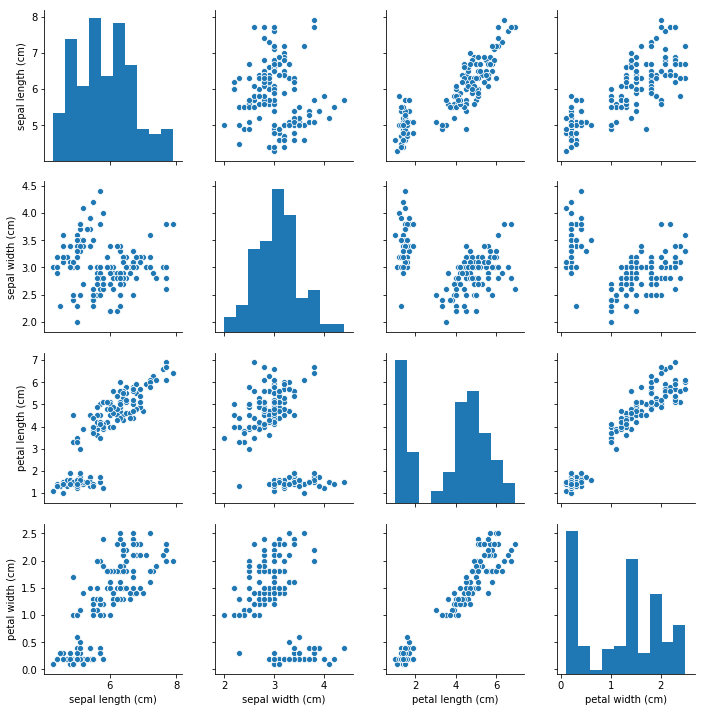

In [11]:
sns.pairplot(iris_df)

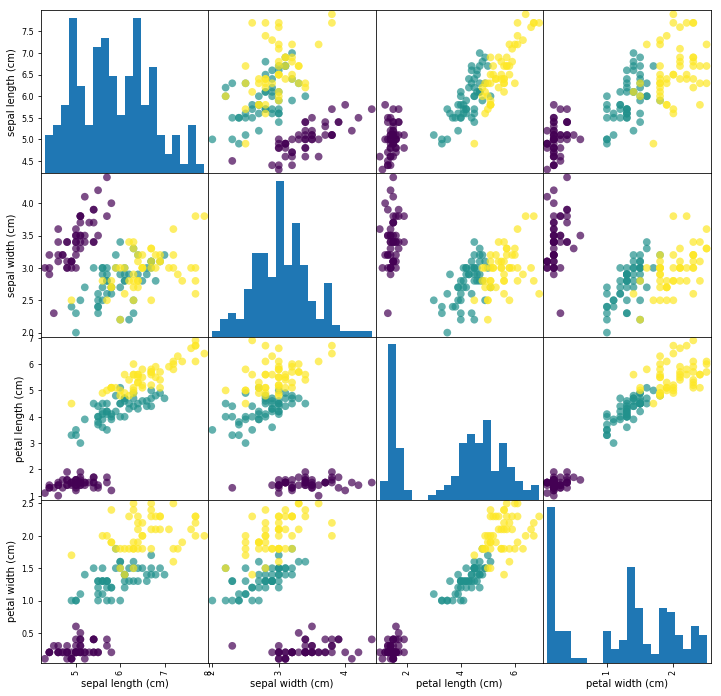

In [12]:
_ = pd.plotting.scatter_matrix(iris_df, c=y, figsize=(12, 12),
                               marker='o', hist_kwds={'bins': 20}, s=60, alpha=0.7)

In [13]:
## Train, test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [15]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

## First classifier

In [16]:
clf = KNeighborsClassifier(n_neighbors=1)

In [17]:
clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [18]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Predicting an example from the training set

In [19]:
idx = 10

In [20]:
sample_features = X_train[10]
sample_target = y_train[10]

In [21]:
sample_features, sample_target

(array([6.4, 2.7, 5.3, 1.9]), 2)

Change the parameters slightly.

In [22]:
unseen_features = [6.4, 2.6, 5.2, 1.8]

In [23]:
clf.predict([unseen_features])

array([2])

## Model performance

In [24]:
clf.score(X_train, y_train)

1.0

In [25]:
clf.score(X_test, y_test)

0.9166666666666666

## Visualization helper

We plot two of the features in the XY plane and color them according the the predicted class.

In [26]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

In [27]:
def grid_from_data(x_data, y_data, xpad=1, ypad=1, h=0.02):
    """
    Given data in the XY plane, generate a mesh, with a given step size h.
    """
    x_min, x_max = x_data.min() - xpad, x_data.max() + xpad
    y_min, y_max = y_data.min() - ypad, y_data.max() + ypad
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)

In [28]:
def plot_predictions(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, font_size=20):
    """
    Given a classifier, XY data, labels for the axes and colors, plot the decision boundaries.
    """
    xx, yy = grid_from_data(x_data, y_data)
    
    data = np.c_[xx.ravel(), yy.ravel()]
    Z = clf.predict(data)

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(20, 10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    
    plt.title(title, fontsize=font_size)

### Sepal features only

```
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

``` 

In [29]:
X_train_sepal_only = X_train[:, :2]
X_test_sepal_only = X_test[:, :2]

In [30]:
clf_sepal = KNeighborsClassifier(n_neighbors=1)
clf_sepal.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Plotting the training data

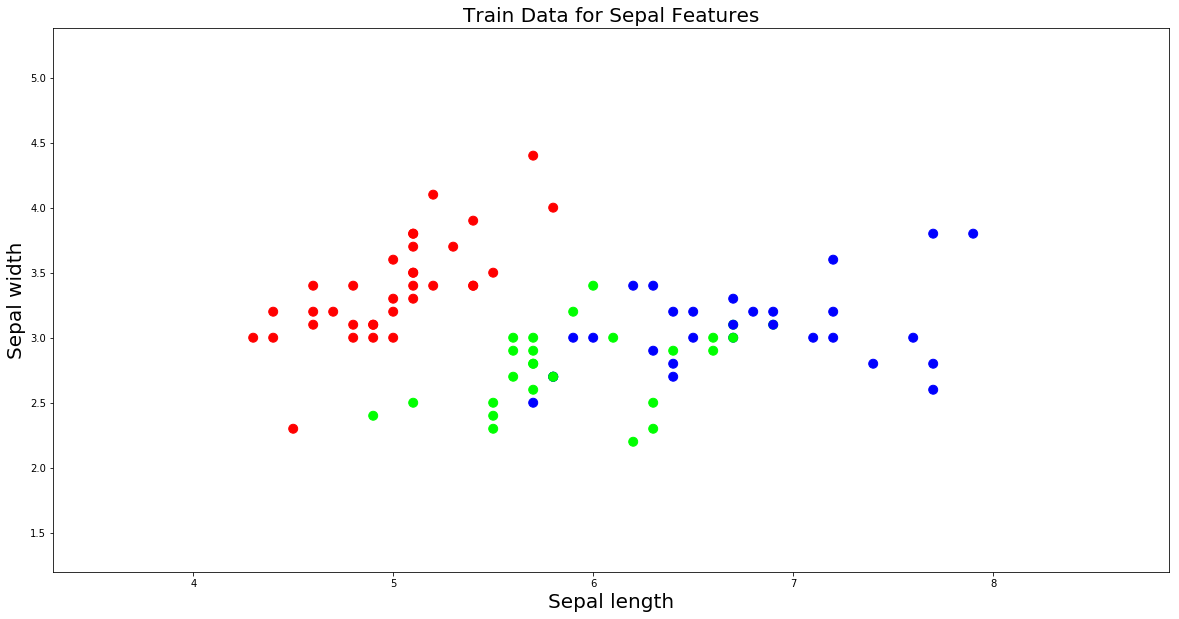

In [31]:
plot_predictions(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
                'Sepal length', 'Sepal width', y_train, mesh=False,
                 title="Train Data for Sepal Features")

In [32]:
clf_sepal.score(X_train_sepal_only, y_train)

0.9444444444444444

In [33]:
clf_sepal.score(X_test_sepal_only, y_test)

0.7333333333333333

We have a good training score, but a much more worse test score. The model did not generalize well. It overfit.

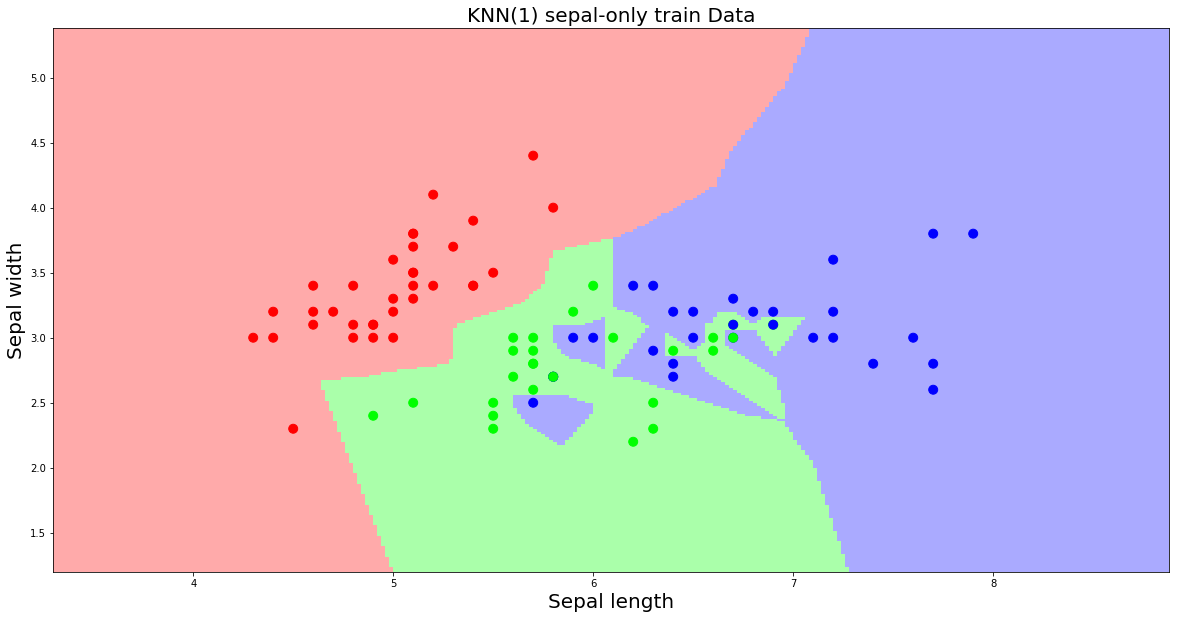

In [34]:
plot_predictions(clf_sepal, X_train_sepal_only[:, 0], X_train_sepal_only[:, 1], 
                 'Sepal length', 'Sepal width', y_train,
                 title="KNN(1) sepal-only train Data")

While the train data got learned perfectly, it is brittle.

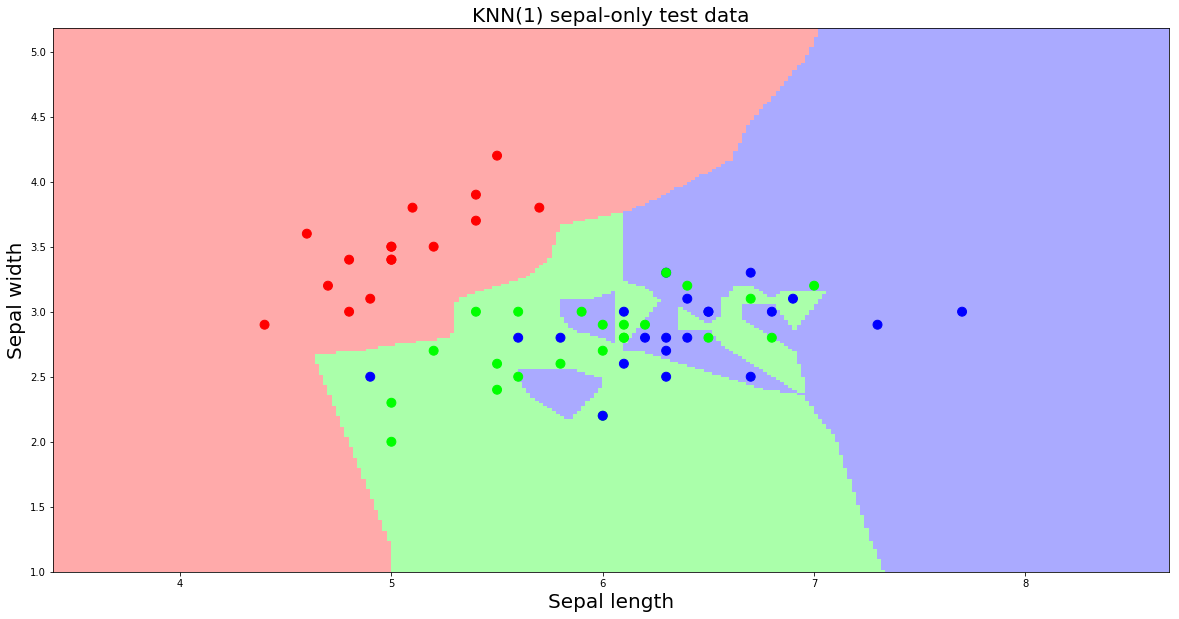

In [35]:
plot_predictions(clf_sepal, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1],
                 'Sepal length', 'Sepal width', y_test,
                 title="KNN(1) sepal-only test data")

## Making the model more robust

Same features (sepal), but more neighbors.

In [36]:
clf_sepal_10 = KNeighborsClassifier(n_neighbors=10)
clf_sepal_10.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [37]:
clf_sepal_10.score(X_train_sepal_only, y_train)

0.8333333333333334

In [38]:
clf_sepal_10.score(X_test_sepal_only, y_test)

0.65

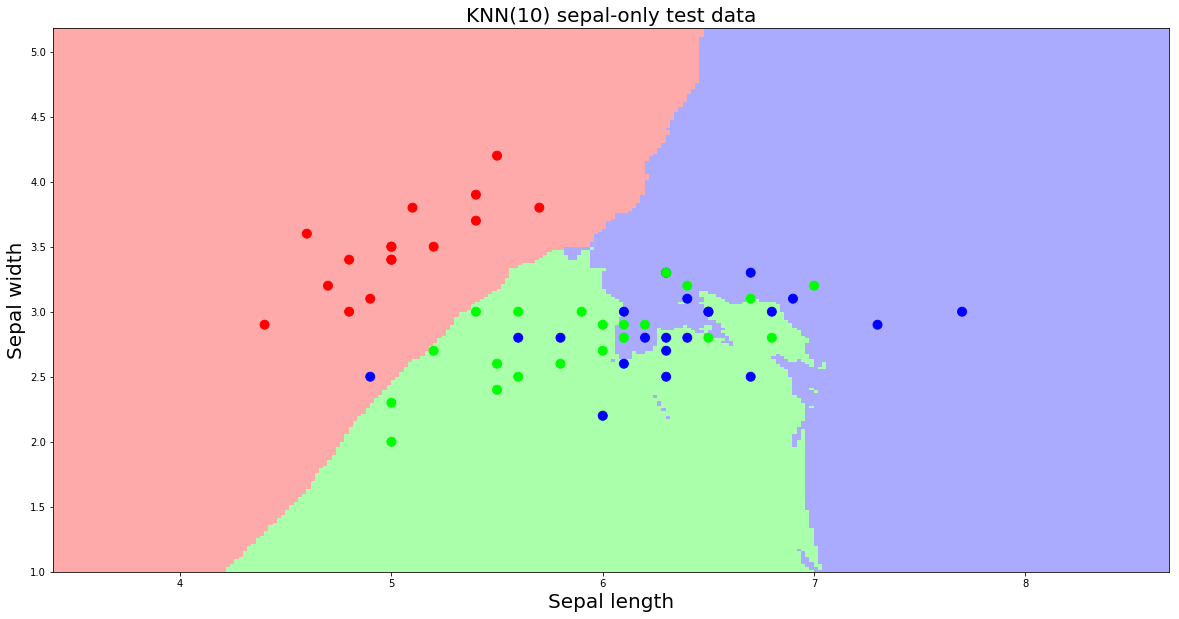

In [39]:
plot_predictions(clf_sepal_10, X_test_sepal_only[:, 0], X_test_sepal_only[:, 1],
                 'Sepal length', 'Sepal width', y_test,
                 title="KNN(10) sepal-only test data")

## Using Petal features only

In [40]:
X_train_petal_only = X_train[:, 2:]
X_test_petal_only = X_test[:, 2:]

In [41]:
clf_petal_10 = KNeighborsClassifier(10)
clf_petal_10.fit(X_train_petal_only, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [42]:
clf_petal_10.score(X_train_petal_only, y_train)

0.9777777777777777

In [43]:
clf_petal_10.score(X_test_petal_only, y_test)

0.9333333333333333

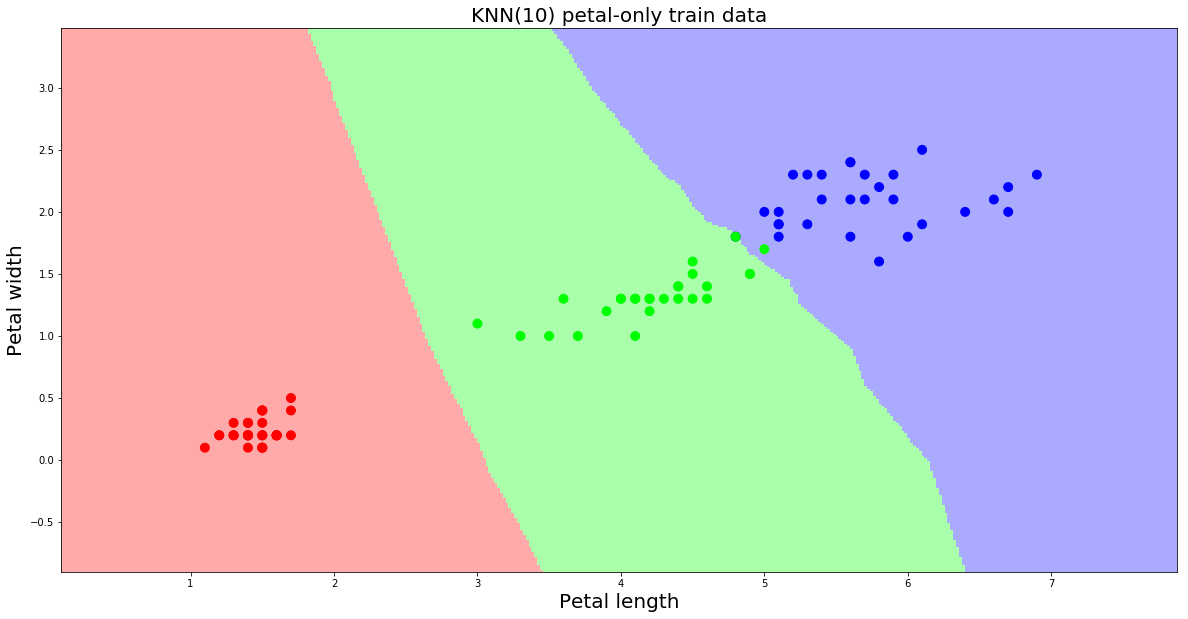

In [44]:
plot_predictions(clf_petal_10, X_train_petal_only[:, 0], X_train_petal_only[:, 1],
                 'Petal length', 'Petal width', y_train,
                 title="KNN(10) petal-only train data")

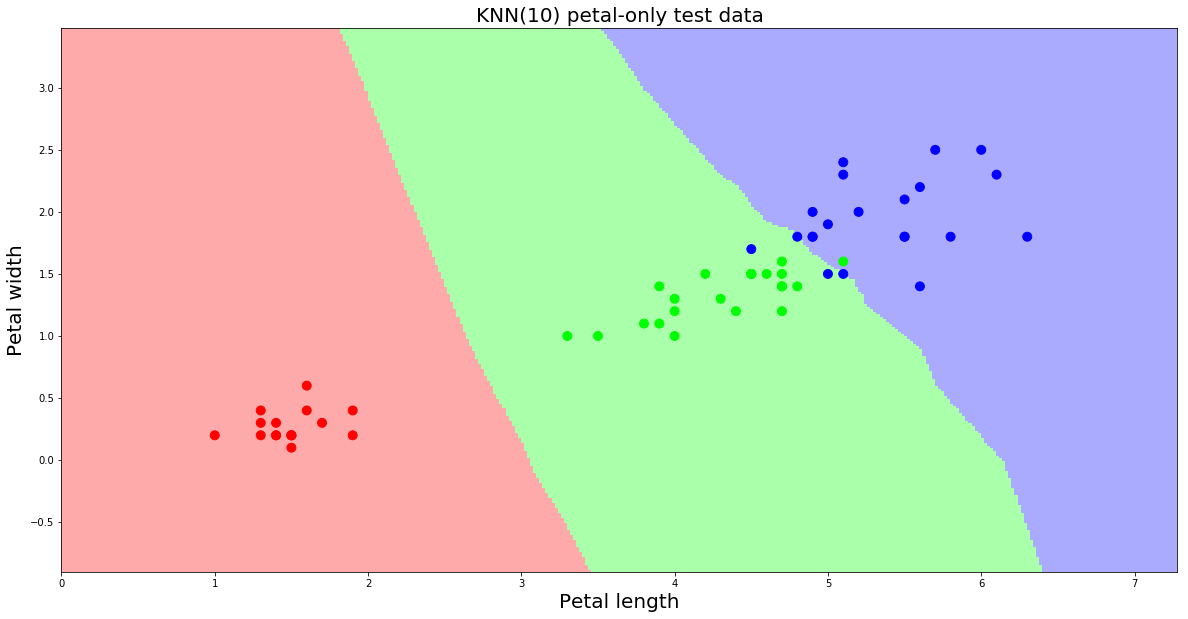

In [45]:
plot_predictions(clf_petal_10, X_test_petal_only[:, 0], X_test_petal_only[:, 1],
                 'Petal length', 'Petal width', y_test,
                 title="KNN(10) petal-only test data")